In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data, img_as_float
from skimage import exposure

### Histograms Equalization in Numpy 

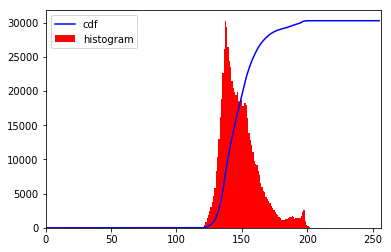

In [2]:
img = cv2.imread('bay.jpg', 0)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

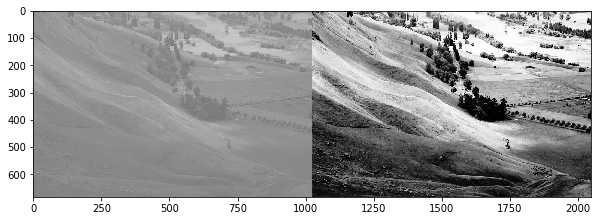

In [3]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]
res = np.hstack((img, img2))
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="gray")

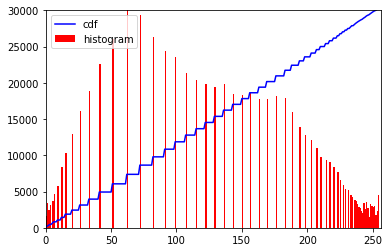

In [4]:
hist, bins = np.histogram(img2.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img2.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.ylim([0, 30000])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

### Histograms Equalization in OpenCV

In [5]:
img = cv2.imread('bay.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) # stacking images side-by-slide
cv2.imwrite('res.png', res)

True

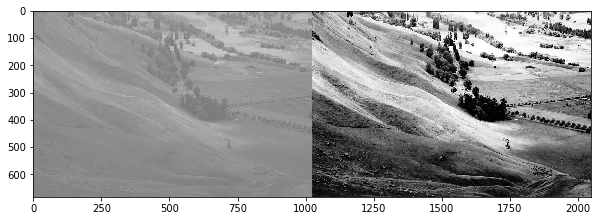

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="gray")

### Histogram Equalization in Skimage

In [7]:
img = plt.imread('bay.jpg')
img = img_as_float(img)
img_eq = exposure.equalize_hist(img)
res = np.hstack((img, img_eq))
cv2.imwrite('res.png', res)

True

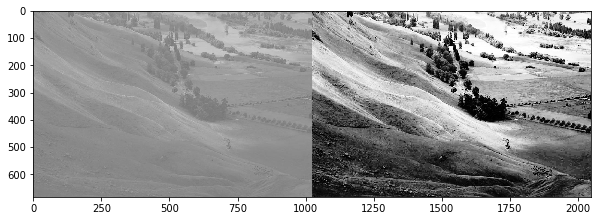

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="gray")

### Apply for brain picture

In [9]:
img = plt.imread('brain.jpg')
img = img_as_float(img)
img_eq = exposure.equalize_hist(img)
res = np.hstack((img, img_eq))
cv2.imwrite('res.png', res)

True

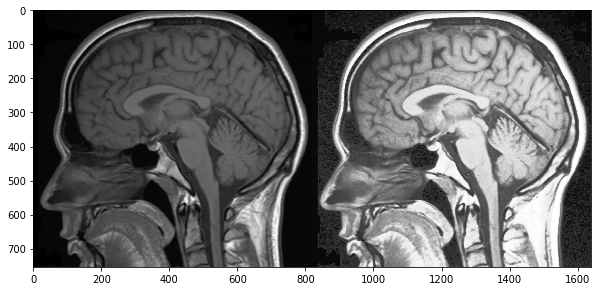

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="gray")